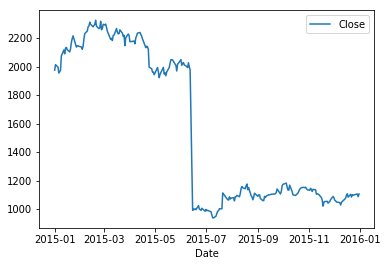

In [30]:
from nsepy import get_history
from datetime import date
import numpy as np
import pandas as pd

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file

data = get_history(symbol="infy", start=date(2015,1,1), end=date(2015,12,31))
data[['Close']].plot()

In [31]:
infy=data.loc[:,['Close']]

In [32]:
infy.head()

,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55


In [33]:
arr=infy['Close'].values

In [34]:
b=[]
for i in range(0,247,1):
        b.append(np.where( (arr[i+1]> ((.02)*arr[i])+arr[i]) | (arr[i+1]< (arr[i]-((.02)*arr[i]))) ,1,0))
        

In [35]:
len(b)

247

In [36]:
znew = np.vstack(b)

In [37]:
q=[]
for i in range(0,247,1):
     q.append(znew[i][0])
     

In [38]:
x=0
y=[x]+ q
y

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [39]:
infy['dummy']=pd.Series(y,name = 'dummy', index=infy.index) 

In [40]:
infy.head()

,Close,dummy
Date,,
2015-01-01,1974.40,0
2015-01-02,2013.20,0
2015-01-05,1995.90,0
2015-01-06,1954.20,1
2015-01-07,1963.55,0


In [41]:
source = ColumnDataSource(infy)

p = figure(x_axis_type="datetime", plot_width=800, plot_height=350)
p.line('Date', 'dummy', source=source, color='red')

source = ColumnDataSource(infy)
output_file("infyclose.html")
show(p)

In [42]:
tcsdata = get_history(symbol="TCS", start=date(2015,1,1), end=date(2015,12,31))
tcs=tcsdata.loc[:,['Close']]
arr=tcs['Close'].values
tcsdata.head()

b=[]
for i in range(0,247,1):
        b.append(np.where( (arr[i+1]> ((.02)*arr[i])+arr[i]) | (arr[i+1]< (arr[i]-((.02)*arr[i]))) ,1,0))
        
        
znew = np.vstack(b)


q=[]
for i in range(0,247,1):
     q.append(znew[i][0])
     
x=0
y=[x]+ q

tcs['dummy']=pd.Series(y,name = 'dummy', index=tcs.index) 

source = ColumnDataSource(tcs)

p = figure(x_axis_type="datetime", plot_width=800, plot_height=350)
p.line('Date', 'dummy', source=source, color='red')

source = ColumnDataSource(tcs)
output_file("tcsclose.html")
show(p)


        

In [27]:
niftydata= get_history(symbol="NIFTYIT ",
                            start=date(2015,1,1),
                            end=date(2015,12,31),
                            index=True)

nifty=niftydata.loc[:,['Volume']]
arr=nifty['Volume'].values


b=[]
for i in range(0,247,1):
        b.append(np.where( (arr[i+1]> ((.02)*arr[i])+arr[i]) | (arr[i+1]< (arr[i]-((.02)*arr[i]))) ,1,0))
        
        
znew = np.vstack(b)


q=[]
for i in range(0,247,1):
     q.append(znew[i][0])
     
x=0
y=[x]+ q

nifty['dummy']=pd.Series(y,name = 'dummy', index=nifty.index) 

source = ColumnDataSource(nifty)

p = figure(x_axis_type="datetime", plot_width=800, plot_height=350)
p.line('Date', 'dummy', source=source, color='red')

source = ColumnDataSource(infy)
output_file("niftyclose.html")
show(p)

IndexError: index 1 is out of bounds for axis 0 with size 0